# Import Libraries

In [1]:
#Load the required libraries

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


# Import Data

In [2]:
bitcoin_df = pd.read_csv("../data/BTCUSDT_final_clean.csv")

In [3]:
bitcoin_df.head()

,date,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,3.675857e+06,7640.0,226.153126,1.624289e+06
1,2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,6.365953e+06,9033.0,570.721419,4.114804e+06
2,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,4.736719e+06,7466.0,357.180263,2.582514e+06
3,2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,5.667367e+06,8337.0,394.810811,2.854987e+06
4,2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,3.379094e+06,5896.0,243.514706,1.759053e+06


Here's a breakdown of each feature:

- **date**: This represents the opening time 

- **open**: This refers to the opening price of the trading instrument at the given period.

- **high**: This represents the highest price reached by the trading instrument during the specified period.

- **low**: This denotes the lowest price reached by the trading instrument during the specified period.

- **close**: This indicates the closing price of the trading instrument at the given period.

- **volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.


- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.

- **count**: This represents the number of trades that occurred during the specified period.

- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.

- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

In [4]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29928 entries, 0 to 29927
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    29928 non-null  object 
 1   open                    29928 non-null  float64
 2   high                    29928 non-null  float64
 3   low                     29928 non-null  float64
 4   close                   29928 non-null  float64
 5   volume                  29928 non-null  float64
 6   quote_volume            29928 non-null  float64
 7   count                   29928 non-null  float64
 8   taker_buy_volume        29928 non-null  float64
 9   taker_buy_quote_volume  29928 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.3+ MB


# Datetime Conversion

In [5]:
# Converting the Date column from object to datetime
bitcoin_df[["date"]] = bitcoin_df[["date"]].apply(pd.to_datetime)

In [6]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29928 entries, 0 to 29927
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    29928 non-null  datetime64[ns]
 1   open                    29928 non-null  float64       
 2   high                    29928 non-null  float64       
 3   low                     29928 non-null  float64       
 4   close                   29928 non-null  float64       
 5   volume                  29928 non-null  float64       
 6   quote_volume            29928 non-null  float64       
 7   count                   29928 non-null  float64       
 8   taker_buy_volume        29928 non-null  float64       
 9   taker_buy_quote_volume  29928 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.3 MB


# Modeling

In [7]:
bitcoin_df.shape

(29928, 10)

In [8]:
# Split the dataset into train and test sets

df_train, df_test = train_test_split(bitcoin_df, test_size=0.2, shuffle=False)

print(df_train.shape)
print(df_test.shape)

(23942, 10)
(5986, 10)


In [9]:
# Model

columns = ['open', 'high', 'low', 'volume', 'quote_volume', 'taker_buy_volume', 'taker_buy_quote_volume']

model_fbprophet = Prophet()

for feature in columns:
    model_fbprophet.add_regressor(feature)

# FB Prophet requires renaming the columns to "ds" and "y"
model_fbprophet.fit(df_train[["date", "close"] + columns].rename(columns={"date": "ds", "close": "y"}))

forecast_fb = model_fbprophet.predict(df_test[["date", "close"] + columns].rename(columns={"date": "ds"}))

forecast_fb.head()

18:51:49 - cmdstanpy - INFO - Chain [1] start processing
18:51:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-24 14:00:00,29890.412097,18917.451614,19246.169704,29890.412097,29890.412097,-10804.447758,-10804.447758,-10804.447758,-4.267214,...,3.988149,3.988149,3.988149,42.885723,42.885723,42.885723,0.0,0.0,0.0,19085.964339
1,2022-09-24 15:00:00,29890.388993,18917.037096,19228.285398,29890.388993,29890.388993,-10825.403419,-10825.403419,-10825.403419,-3.673714,...,3.975986,3.975986,3.975986,42.898901,42.898901,42.898901,0.0,0.0,0.0,19064.985574
2,2022-09-24 16:00:00,29890.365888,18988.959837,19309.159533,29890.365888,29890.365888,-10748.984063,-10748.984063,-10748.984063,-1.662209,...,3.953116,3.953116,3.953116,42.912142,42.912142,42.912142,0.0,0.0,0.0,19141.381825
3,2022-09-24 17:00:00,29890.342784,18951.296214,19290.367181,29890.342784,29890.342784,-10767.258585,-10767.258585,-10767.258585,0.485522,...,3.919753,3.919753,3.919753,42.925448,42.925448,42.925448,0.0,0.0,0.0,19123.084199
4,2022-09-24 18:00:00,29890.319679,18925.307362,19260.594469,29890.319679,29890.319679,-10791.380412,-10791.380412,-10791.380412,1.820853,...,3.876112,3.876112,3.876112,42.938820,42.938820,42.938820,0.0,0.0,0.0,19098.939267


- **ds** is the time series data.

- **yhat** is the prediction

- **yhat_lower**, and **yhat_upper** are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels)

- **trend** shows the long-term growth, shrink, or stagnancy of the data

- **trend_lower**, and **trend_upper** is the uncertainty levels

In [10]:
# Create Forecast Column

df_test["Forecast_Prophet"] = forecast_fb.yhat.values

In [11]:
df_test[["date","close","Forecast_Prophet"]]

,date,close,Forecast_Prophet
23942,2022-09-24 14:00:00,19085.36,19085.964339
23943,2022-09-24 15:00:00,19124.14,19064.985574
23944,2022-09-24 16:00:00,19093.86,19141.381825
23945,2022-09-24 17:00:00,19085.65,19123.084199
23946,2022-09-24 18:00:00,19128.11,19098.939267
...,...,...,...
29923,2023-05-31 19:00:00,27010.57,26845.779098
29924,2023-05-31 20:00:00,27114.20,26858.291993
29925,2023-05-31 21:00:00,27090.79,26834.002486
29926,2023-05-31 22:00:00,27183.98,26931.549287


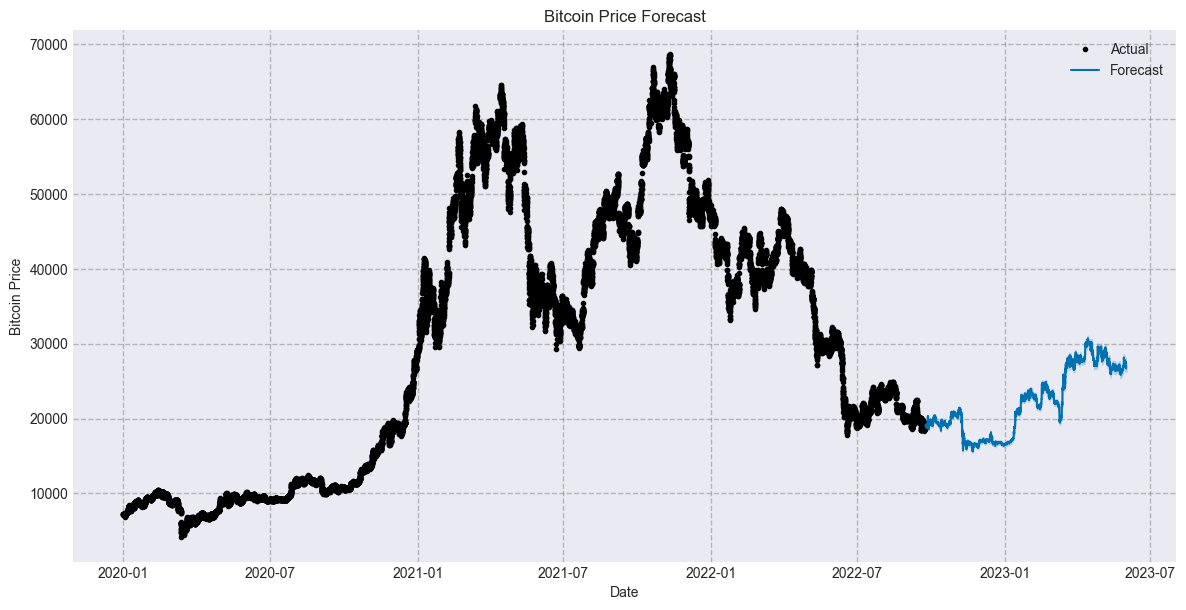

In [12]:
# Plotting the forecast

fig, ax = plt.subplots(figsize=(12, 6))
model_fbprophet.plot(forecast_fb, ax=ax)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')
ax.set_title('Bitcoin Price Forecast')

# Add grid lines
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Add legend
ax.legend(['Actual', 'Forecast'])

# Display the plot
plt.show()


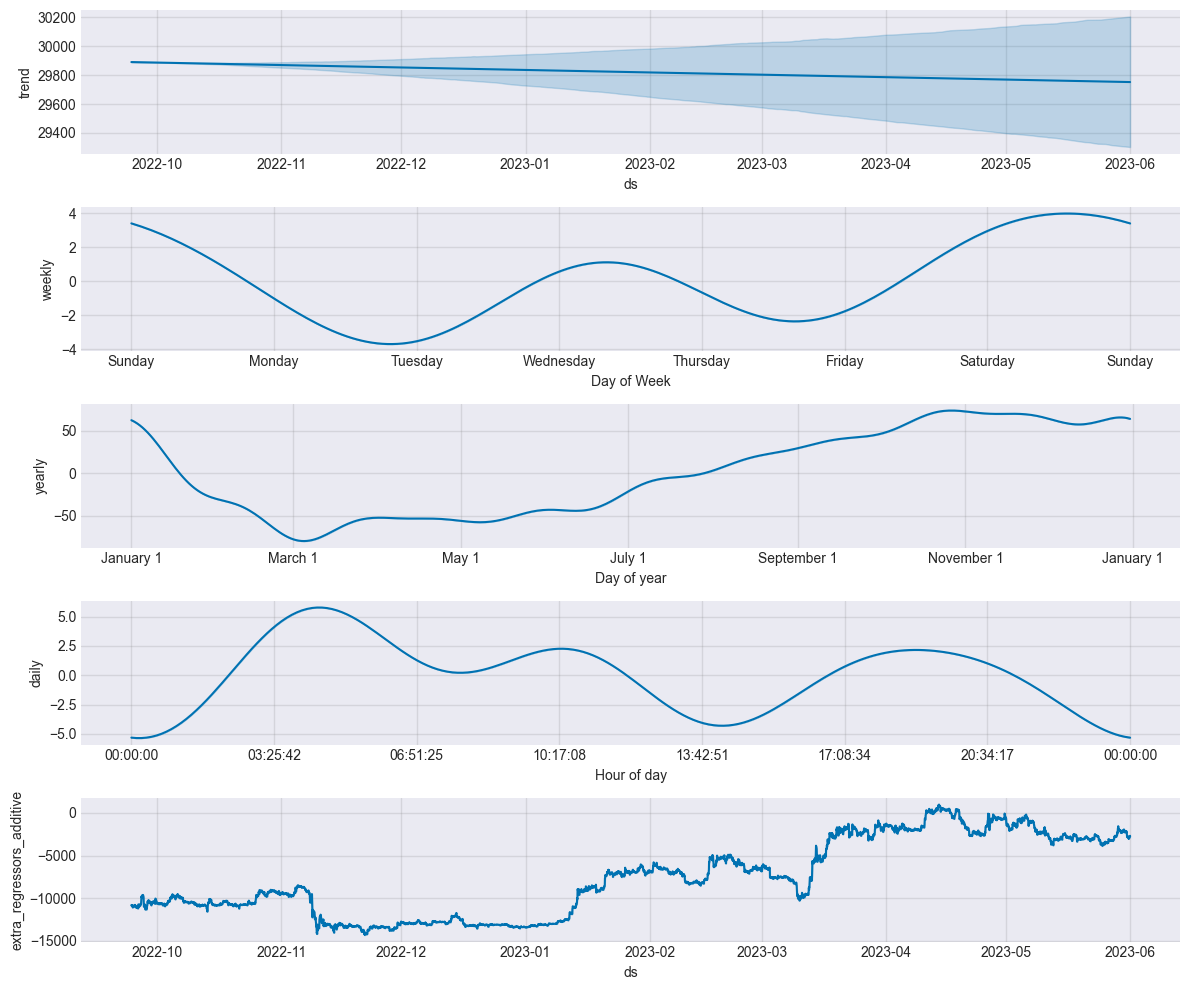

In [13]:
# Plotting the components

fig = model_fbprophet.plot_components(forecast_fb, figsize=(12, 10))

# Customize the plot
plt.tight_layout()

# Display the plot
plt.show()


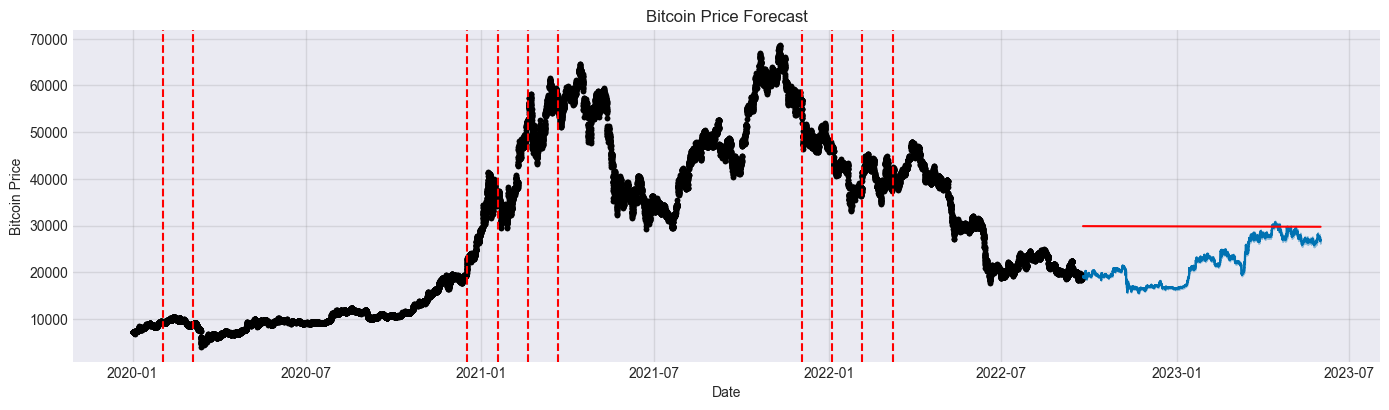

In [14]:
# Plotting the forecast
fig = model_fbprophet.plot(forecast_fb, figsize=(14, 4))

# Add changepoints to the plot
model_fbprophet.plot(forecast_fb, ax=fig.gca())

add_changepoints_to_plot(fig.gca(), model_fbprophet, forecast_fb)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Forecast')

# Display the plot
plt.show()


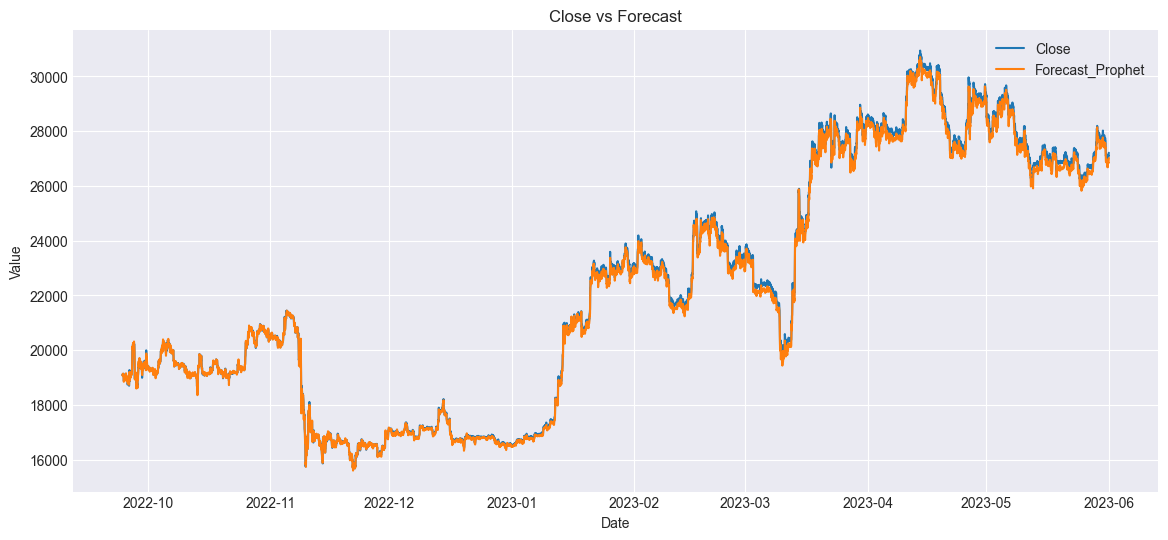

In [15]:
# Plotting Close and Forecast_Prophet with increased width

fig, ax = plt.subplots(figsize=(14, 6))

# Plotting Close and Forecast_Prophet
ax.plot(df_test["date"], df_test["close"], label="Close")
ax.plot(df_test["date"], df_test["Forecast_Prophet"], label="Forecast_Prophet")

# Customize the plot
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Close vs Forecast")
ax.legend()

# Display the plot
plt.show()

In [19]:
# Results Prophet Model

test_mae_prophet = round(mean_absolute_error(df_test['close'], df_test['Forecast_Prophet']), 2)
test_rmse_prophet = round(np.sqrt(mean_squared_error(df_test['close'], df_test['Forecast_Prophet'])), 2)
test_r2_prophet = round(r2_score(df_test['close'], df_test['Forecast_Prophet'])*100, 2)

print(f"Prophet's Test MAE : {test_mae_prophet}")
print(f"Prophet's Test RMSE : {test_rmse_prophet}")
print(f"Prophet's Test R2 : {test_r2_prophet}")

Prophet's Test MAE : 125.39
Prophet's Test RMSE : 157.45
Prophet's Test R2 : 99.88
